In [2]:
%run 'data_preparation.ipynb'

In [3]:
from pandas.tools.plotting import autocorrelation_plot
from matplotlib.pylab import rcParams
import math
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from dateutil import parser

/home/jawahar/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [4]:
per_day = year.pivot_table(index=['BOOKING_DATE'],values=['BOOKING_HAL_ID'], aggfunc=lambda x: len(x.unique()))

# Creating ARIMA Model

In [5]:
model =sm.tsa.statespace.SARIMAX(per_day['BOOKING_HAL_ID'],order=(0,1,0),seasonal_order=(1,1,1,12))

In [6]:
results = model.fit()

In [7]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     BOOKING_HAL_ID   No. Observations:                 1096
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood               -6344.695
Date:                            Thu, 15 Mar 2018   AIC                          12695.390
Time:                                    16:41:25   BIC                          12710.388
Sample:                                01-01-2014   HQIC                         12701.065
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2423    846.789     -0.000      1.000   -1659.917    1659.433
ma.S.L12      -0.9999   1115.025   

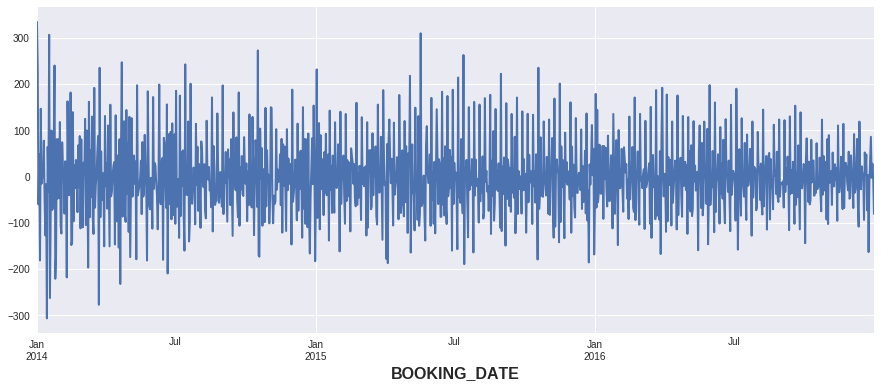

In [8]:
results.resid.plot()

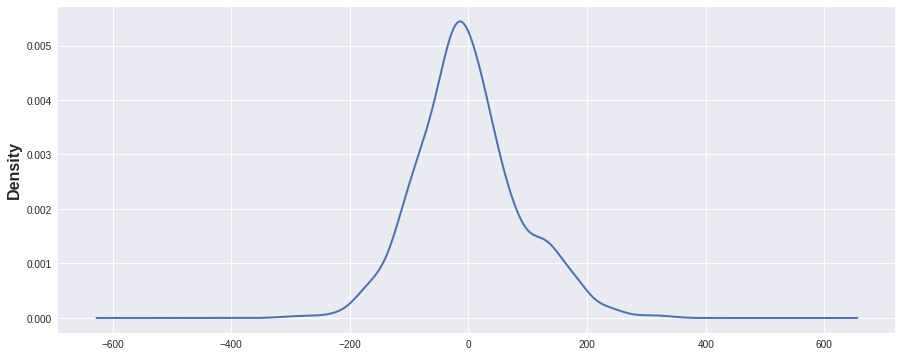

In [9]:
results.resid.plot(kind='kde')

# Forecasting

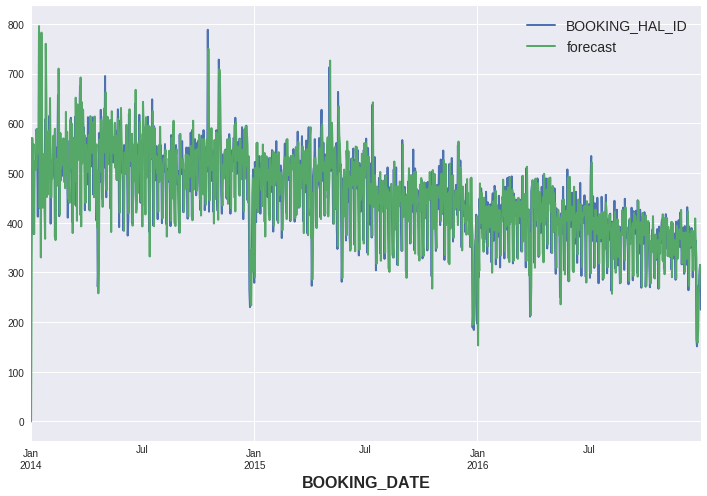

In [10]:
per_day['forecast'] = results.predict(start=0, end=1096)
per_day[['BOOKING_HAL_ID', 'forecast']].plot(figsize=(12,8))

# Prediction for next 24 months

In [11]:
from pandas.tseries.offsets import DateOffset

In [12]:
future_dates = [per_day.index[-1] + DateOffset(days=x) for x in range(1,730)]

In [13]:
future_df = pd.DataFrame(index=future_dates, columns=per_day.columns)

In [14]:
final_df = pd.concat([per_day,future_df])

In [15]:
final_df['forecast'] = results.predict(start=0, end=1821)

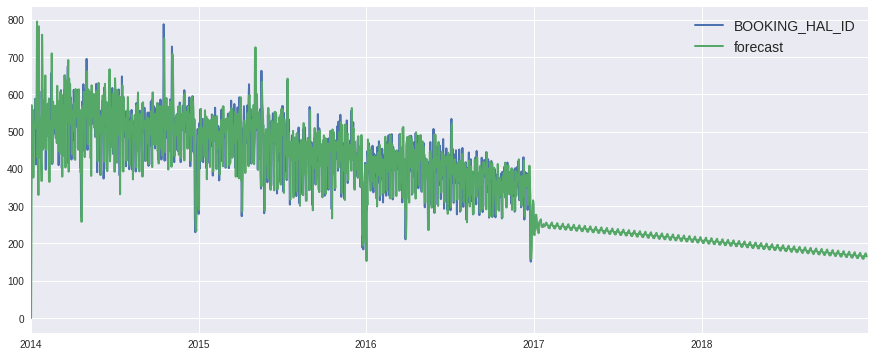

In [16]:
final_df[['BOOKING_HAL_ID','forecast']].plot()

# Observations